In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sistema massa-mola
m = 1.0      # massa (kg)
k = 1.0      # constante elástica (N/m)
x0 = 1.0     # posição inicial (m)
v0 = 0.0     # velocidade inicial (m/s)
dt = 0.01    # passo de tempo (s)
T = 100       # tempo total de simulação (s)

# Número de passos
N = int(T / dt)

# Inicializações
x = np.zeros(N)
v = np.zeros(N)
a = np.zeros(N)
t = np.linspace(0, T, N)

# Condições iniciais
x[0] = x0
a[0] = -k * x[0] / m
# Verlet precisa de x[1], que calculamos com Taylor expandido
x[1] = x[0] + v0 * dt + 0.5 * a[0] * dt**2

# Evolução temporal pelo método de Verlet
for i in range(1, N - 1):
    a[i] = -k * x[i] / m
    x[i+1] = 2*x[i] - x[i-1] + a[i]*dt**2

# Estimativa da velocidade usando diferença central
v[1:-1] = (x[2:] - x[:-2]) / (2*dt)
v[0] = v[1]
v[-1] = v[-2]

# Cálculo das energias
Ec = 0.5 * m * v**2              # cinética
Ep = 0.5 * k * x**2              # potencial
E  = Ec + Ep                     # total

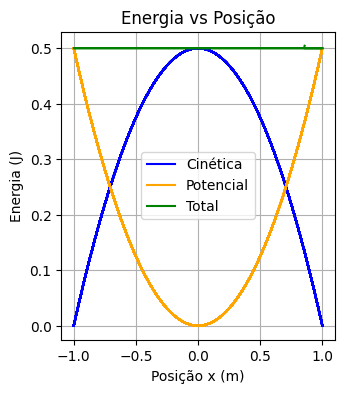

In [ ]:
# GRÁFICO 1: Energia vs Posição
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(x, Ec, label='Cinética', color='blue')
plt.plot(x, Ep, label='Potencial', color='orange')
plt.plot(x, E,  label='Total', color='green')
plt.xlabel('Posição x (m)')
plt.ylabel('Energia (J)')
plt.title('Energia vs Posição')
plt.legend()
plt.grid(True)
plt.show()

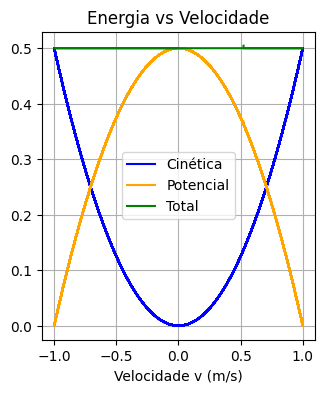

In [ ]:
# GRÁFICO 2: Energia vs Velocidade
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 2)
plt.plot(v, Ec, label='Cinética', color='blue')
plt.plot(v, Ep, label='Potencial', color='orange')
plt.plot(v, E,  label='Total', color='green')
plt.xlabel('Velocidade v (m/s)')
plt.title('Energia vs Velocidade')
plt.legend()
plt.grid(True)
plt.show()

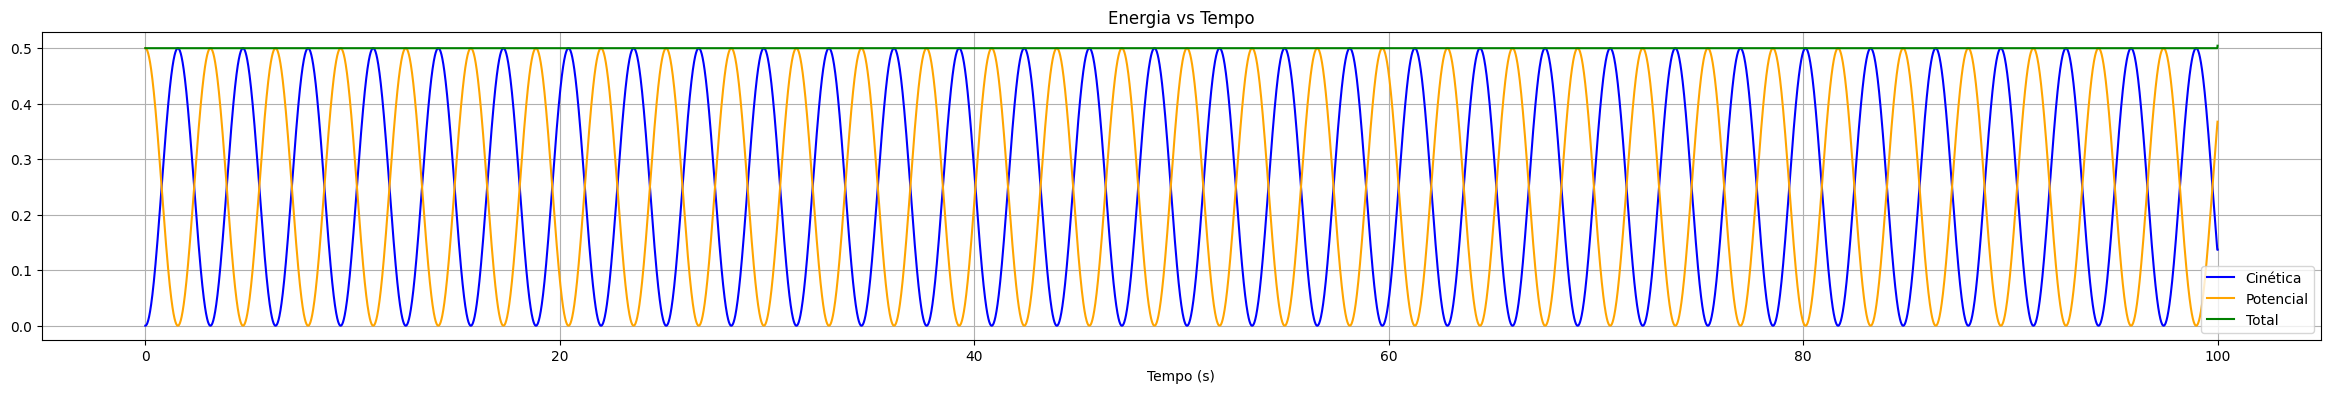

In [ ]:
# GRÁFICO 3: Energia vs Tempo
plt.figure(figsize=(100, 4))
plt.subplot(1, 3, 3)
plt.plot(t, Ec, label='Cinética', color='blue')
plt.plot(t, Ep, label='Potencial', color='orange')
plt.plot(t, E,  label='Total', color='green')
plt.xlabel('Tempo (s)')
plt.title('Energia vs Tempo')
plt.legend()
plt.grid(True)
plt.show()